In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from library.sb_utils import save_file
# scipi is a library for statistical tests and visualizations 
from scipy import stats
from scipy.stats.mstats import winsorize
# random enables us to generate random numbers
import random
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [18]:
df = pd.read_csv('../data/df2_cleaned.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,0,0,0,0,2,0,1,0,0,2,0,0,0,2,No
1,34,F,0,1,0,0,0,0,1,0,0,2,0,0,0,0,No
2,30,F,0,0,0,0,1,0,1,0,0,2,0,0,0,0,No
3,62,F,0,0,0,0,1,0,1,0,0,2,0,0,0,0,No
4,62,F,0,0,0,0,0,0,1,1,0,2,0,0,0,0,No


In [19]:
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,Gender,2
1,Recurred,2


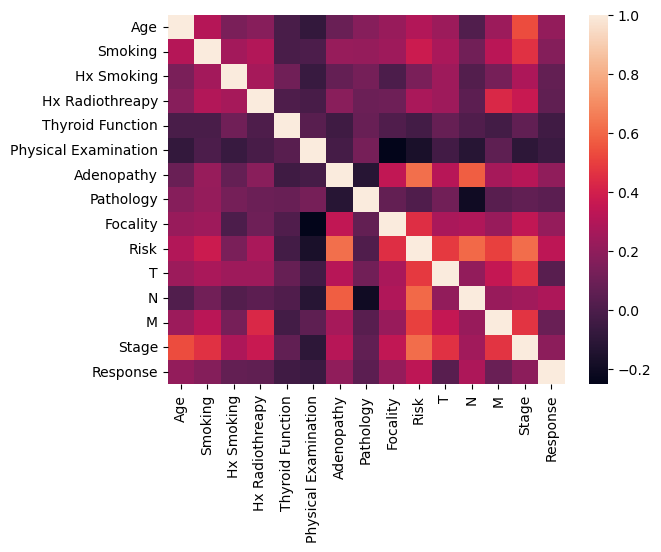

In [20]:
sns.heatmap(df.corr(numeric_only = True))
plt.show()

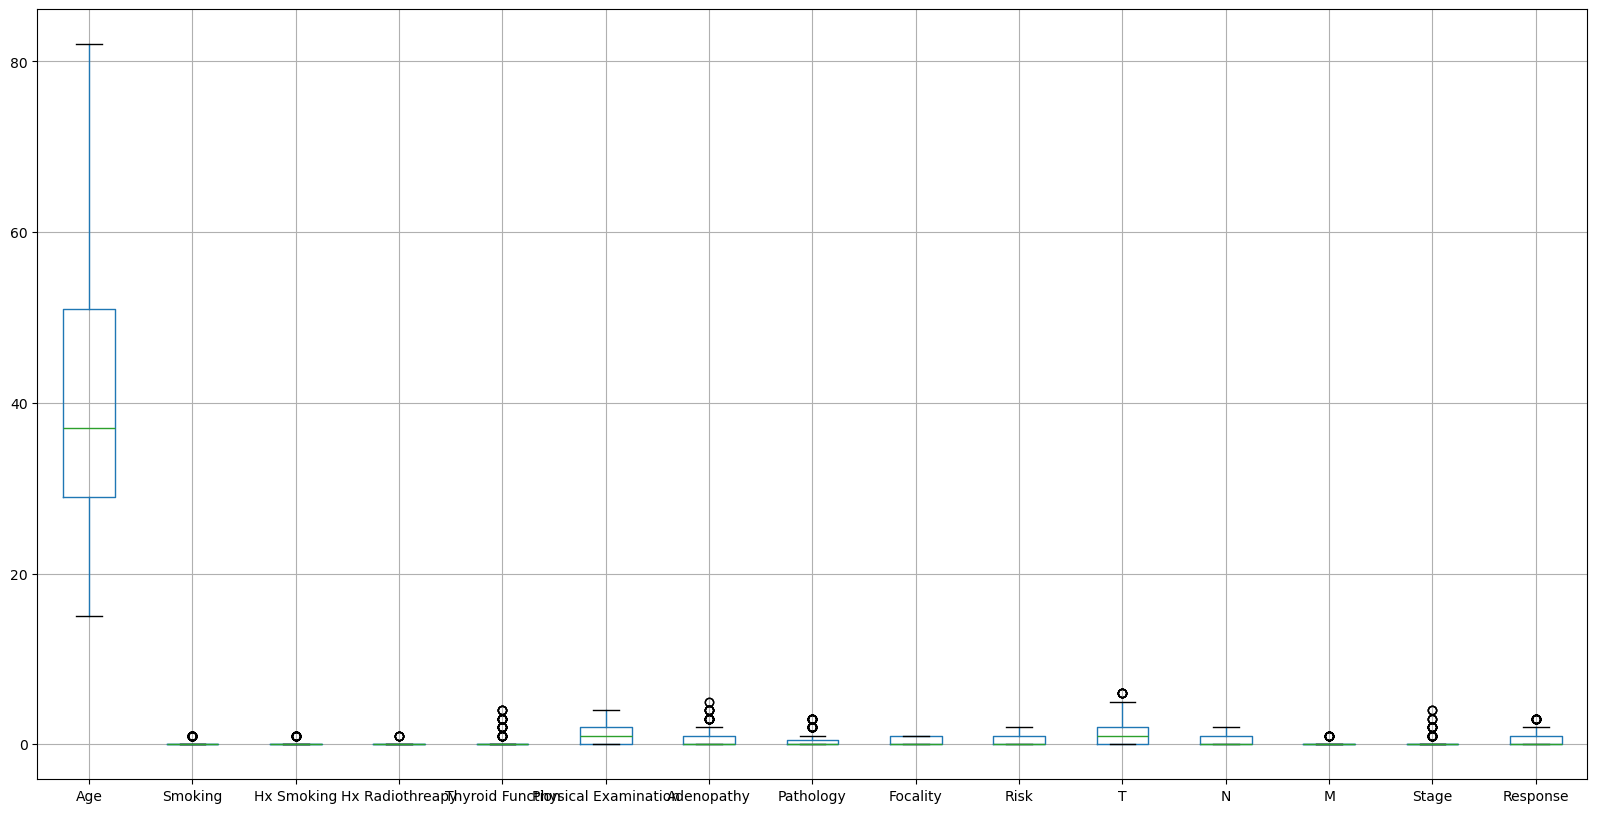

In [21]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

In [22]:
# features = Age, Gender
# numerical values = Smoking, Hx Smoking, Hx Radiothreapy, Thyroid Function, Physical Examination, Andenopathy, Pathology, Focality, Risk, 
# T, N, M, Stage, Response 
# y = Recurred

In [23]:
features=['Age', "Gender"]
dummies=pd.get_dummies(df[features])
merged=pd.concat([df,dummies],axis=1)
final=merged.drop(['Age', "Gender"], axis=1)
df=final
df.head()

,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Gender_F,Gender_M
0,0,0,0,0,2,0,1,0,0,2,0,0,0,2,No,True,False
1,0,1,0,0,0,0,1,0,0,2,0,0,0,0,No,True,False
2,0,0,0,0,1,0,1,0,0,2,0,0,0,0,No,True,False
3,0,0,0,0,1,0,1,0,0,2,0,0,0,0,No,True,False
4,0,0,0,0,0,0,1,1,0,2,0,0,0,0,No,True,False


In [24]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y
X= df.drop(['Recurred'],axis=1)
y=df['Recurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [25]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.935
Random Forest: f1-score=0.935


In [28]:
class_names=['Yes', 'No'] # name  of classes

Confusion matrix, without normalization
[[45  3]
 [ 2 27]]
Normalized confusion matrix
[[0.94 0.06]
 [0.07 0.93]]


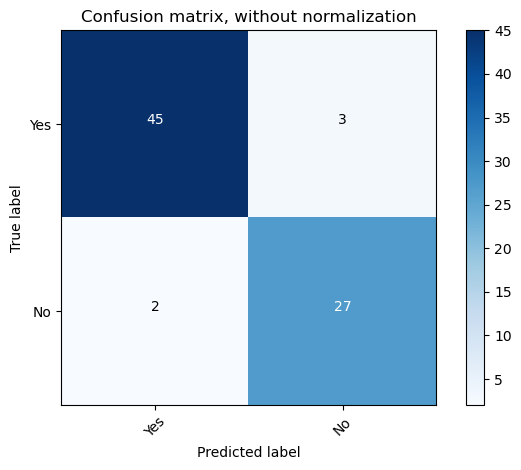

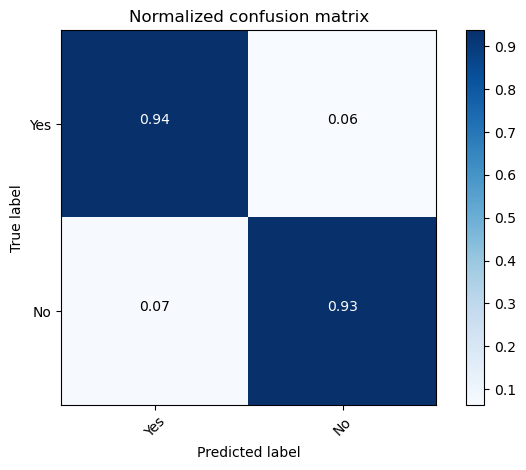

In [29]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

16


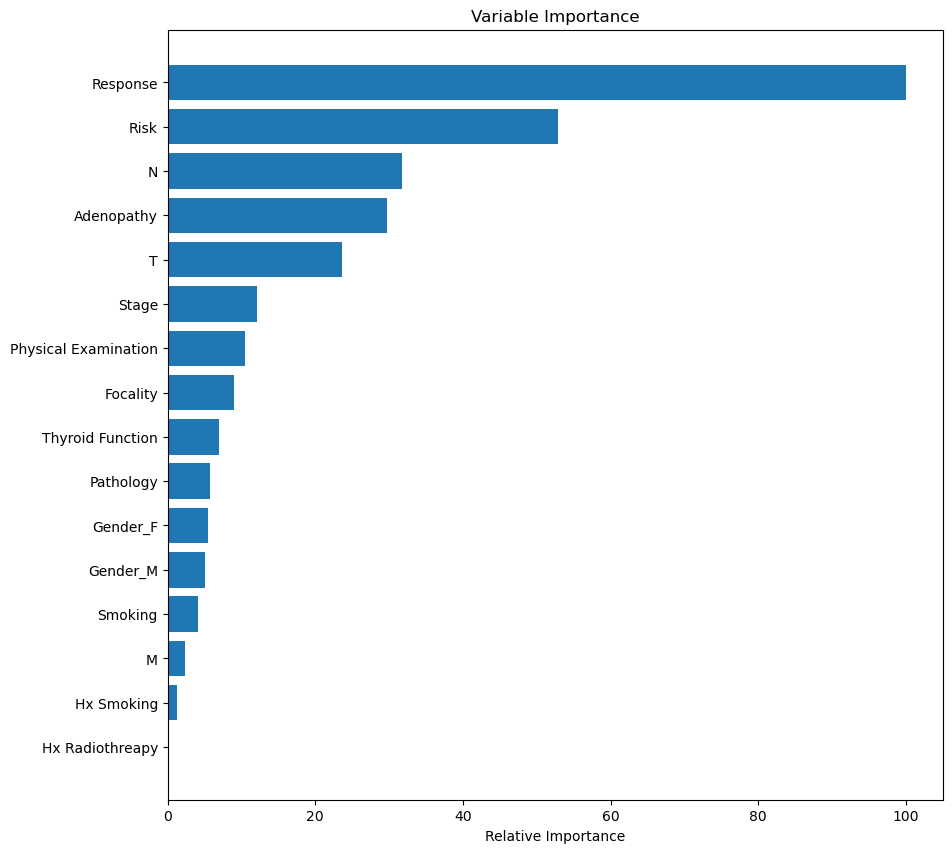

In [30]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()